In [1]:
# Import Libraries, Census, and Keys
import pandas as pd
import requests
from census import Census
import gmaps
import json
from config import (api_key, gkey)
c = Census(api_key, year=2017)

# Configure gmaps (not sure why we need this)
gmaps.configure(api_key=gkey)


In [2]:
# Search Census data, retrive relavant information by state
census_data = c.acs5.get(("NAME", "B01003_001E","B02001_002E",
                          "B02001_003E","B02001_005E","B03001_003E",
                          "B19301_001E","B17001_002E","B17001A_002E",
                          "B17001B_002E","B17001D_002E","B17001I_002E"),
                         {'for': 'state:*'})

# Make DF
census_df = pd.DataFrame(census_data)
census_df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_005E,B03001_003E,B19301_001E,B17001_002E,B17001A_002E,B17001B_002E,B17001D_002E,B17001I_002E,state
0,Puerto Rico,3468963.0,2389446.0,338939.0,7789.0,3432611.0,12081.0,1543220.0,1026976.0,154131.0,4113.0,1530395.0,72
1,Alabama,4850771.0,3317702.0,1287167.0,62815.0,198375.0,25746.0,849699.0,432404.0,360407.0,8597.0,62607.0,01
2,Alaska,738565.0,481971.0,23702.0,45604.0,50162.0,35065.0,73380.0,31659.0,3387.0,4673.0,5463.0,02
3,Arizona,6809946.0,5277661.0,292831.0,213417.0,2103523.0,27964.0,1128046.0,764158.0,62682.0,27329.0,513987.0,04
4,Arkansas,2977944.0,2302141.0,459969.0,42368.0,213246.0,24426.0,524211.0,332449.0,139406.0,5909.0,61991.0,05


In [3]:
# Rename to make user friendly
census_df = census_df.rename(columns={"NAME": "Name", 
                                      "state": "State",
                                      
                                      "B01003_001E": "Total Population",
                                      "B02001_002E": "White Population",
                                      "B02001_003E": "Black Population",
                                      "B02001_005E": "Asian Population",
                                      "B03001_003E": "Hispanic Population",
                                      
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Total Poverty",
                                      "B17001A_002E": "White Poverty",
                                      "B17001B_002E": "Black Poverty",
                                      "B17001D_002E": "Asian Poverty",
                                      "B17001I_002E": "Hispanic Poverty"})


#Why doesn't this work? 
#census_df["Others Population"] = census_df[ "Total Population"]-census_df[ "White Population"]-\
#census_df[ "Black Population"]-census_df[ "Asian Population"]-census_df[ "Hispanic Population"]

#Calculate Population by Ethnicity
census_df["White Population Percentage"] = 100 * (census_df["White Population"]/census_df["Total Population"])
census_df["Black Population Percentage"] = 100 * (census_df["Black Population"]/census_df["Total Population"])
census_df["Asian Population Percentage"] = 100 * (census_df["Asian Population"]/census_df["Total Population"])
census_df["Hispanic Population Percentage"] = 100 * (census_df["Hispanic Population"]/census_df["Total Population"])

census_df.head()

,Name,Total Population,White Population,Black Population,Asian Population,Hispanic Population,Per Capita Income,Total Poverty,White Poverty,Black Poverty,Asian Poverty,Hispanic Poverty,State,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage
0,Puerto Rico,3468963.0,2389446.0,338939.0,7789.0,3432611.0,12081.0,1543220.0,1026976.0,154131.0,4113.0,1530395.0,72,68.880700,9.770614,0.224534,98.952079
1,Alabama,4850771.0,3317702.0,1287167.0,62815.0,198375.0,25746.0,849699.0,432404.0,360407.0,8597.0,62607.0,01,68.395354,26.535307,1.294949,4.089556
2,Alaska,738565.0,481971.0,23702.0,45604.0,50162.0,35065.0,73380.0,31659.0,3387.0,4673.0,5463.0,02,65.257763,3.209196,6.174677,6.791819
3,Arizona,6809946.0,5277661.0,292831.0,213417.0,2103523.0,27964.0,1128046.0,764158.0,62682.0,27329.0,513987.0,04,77.499308,4.300049,3.133902,30.888982
4,Arkansas,2977944.0,2302141.0,459969.0,42368.0,213246.0,24426.0,524211.0,332449.0,139406.0,5909.0,61991.0,05,77.306390,15.445858,1.422727,7.160847


In [4]:
# Rearrange DF
census_df = census_df[["Name", 
                       
                       "Total Population","White Population",
                       "Black Population","Asian Population",
                       "Hispanic Population",
                       
                       "White Population Percentage",
                       "Black Population Percentage",
                       "Asian Population Percentage",
                       "Hispanic Population Percentage",
                       
                       "Per Capita Income","Total Poverty",
                       "White Poverty","Black Poverty",
                       "Asian Poverty","Hispanic Poverty"]]

# See my data
census_df.head()

,Name,Total Population,White Population,Black Population,Asian Population,Hispanic Population,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Per Capita Income,Total Poverty,White Poverty,Black Poverty,Asian Poverty,Hispanic Poverty
0,Puerto Rico,3468963.0,2389446.0,338939.0,7789.0,3432611.0,68.880700,9.770614,0.224534,98.952079,12081.0,1543220.0,1026976.0,154131.0,4113.0,1530395.0
1,Alabama,4850771.0,3317702.0,1287167.0,62815.0,198375.0,68.395354,26.535307,1.294949,4.089556,25746.0,849699.0,432404.0,360407.0,8597.0,62607.0
2,Alaska,738565.0,481971.0,23702.0,45604.0,50162.0,65.257763,3.209196,6.174677,6.791819,35065.0,73380.0,31659.0,3387.0,4673.0,5463.0
3,Arizona,6809946.0,5277661.0,292831.0,213417.0,2103523.0,77.499308,4.300049,3.133902,30.888982,27964.0,1128046.0,764158.0,62682.0,27329.0,513987.0
4,Arkansas,2977944.0,2302141.0,459969.0,42368.0,213246.0,77.306390,15.445858,1.422727,7.160847,24426.0,524211.0,332449.0,139406.0,5909.0,61991.0


In [5]:
# Set parameters 
params = {"key":gkey}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Run through all rows in my DF
for index, row in census_df.iterrows():
    
    # Grab the "Name" column of every Index/Row
    state_type = row['Name']
    
    # Add newly grabbed data and put in inside "params" dictionary
    params['address'] = state_type 
    
    # Now that paramerts are complete, read URL with json
    response = requests.get(base_url, params = params).json()
    
    # Take care of any possible issues
    try:
        
        # After digging through URL data, set desired info equal to "lat" & "lng"
        latitude = response['results'][0]["geometry"]['location']['lat']
        longitude = response['results'][0]["geometry"]['location']['lng'] 
        
        # Put data into DF
        census_df.loc[index,'Latitude']= latitude
        census_df.loc[index,'Longitude']= longitude
        
    # Possible issues with code
    except (KeyError, IndexError):
        print(f'Not Found')
        
# See my Data
census_df.head(10)


,Name,Total Population,White Population,Black Population,Asian Population,Hispanic Population,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Per Capita Income,Total Poverty,White Poverty,Black Poverty,Asian Poverty,Hispanic Poverty,Latitude,Longitude
0,Puerto Rico,3468963.0,2389446.0,338939.0,7789.0,3432611.0,68.880700,9.770614,0.224534,98.952079,12081.0,1543220.0,1026976.0,154131.0,4113.0,1530395.0,18.220833,-66.590149
1,Alabama,4850771.0,3317702.0,1287167.0,62815.0,198375.0,68.395354,26.535307,1.294949,4.089556,25746.0,849699.0,432404.0,360407.0,8597.0,62607.0,32.318231,-86.902298
2,Alaska,738565.0,481971.0,23702.0,45604.0,50162.0,65.257763,3.209196,6.174677,6.791819,35065.0,73380.0,31659.0,3387.0,4673.0,5463.0,64.200841,-149.493673
3,Arizona,6809946.0,5277661.0,292831.0,213417.0,2103523.0,77.499308,4.300049,3.133902,30.888982,27964.0,1128046.0,764158.0,62682.0,27329.0,513987.0,34.048928,-111.093731
4,Arkansas,2977944.0,2302141.0,459969.0,42368.0,213246.0,77.306390,15.445858,1.422727,7.160847,24426.0,524211.0,332449.0,139406.0,5909.0,61991.0,35.201050,-91.831833
5,California,38982847.0,23607242.0,2263222.0,5503672.0,15105860.0,60.558024,5.805687,14.118189,38.750017,33128.0,5773408.0,3183011.0,502610.0,607792.0,3052999.0,36.778261,-119.417932
6,Colorado,5436519.0,4576201.0,221155.0,164771.0,1157200.0,84.175205,4.067952,3.030818,21.285679,34845.0,612143.0,467164.0,41732.0,18258.0,218275.0,39.550051,-105.782067
7,Connecticut,3594478.0,2757064.0,376240.0,156450.0,551916.0,76.702765,10.467167,4.352510,15.354552,41365.0,350783.0,205283.0,66875.0,12665.0,123584.0,41.603221,-73.087749
8,District of Columbia,672391.0,273471.0,321062.0,25558.0,71829.0,40.671425,47.749301,3.801062,10.682624,50832.0,111025.0,18242.0,81287.0,3697.0,9665.0,38.907192,-77.036871
9,Delaware,943732.0,652170.0,206290.0,36553.0,84793.0,69.105424,21.858960,3.873239,8.984860,32625.0,111304.0,59997.0,37039.0,2983.0,20127.0,38.910832,-75.527670


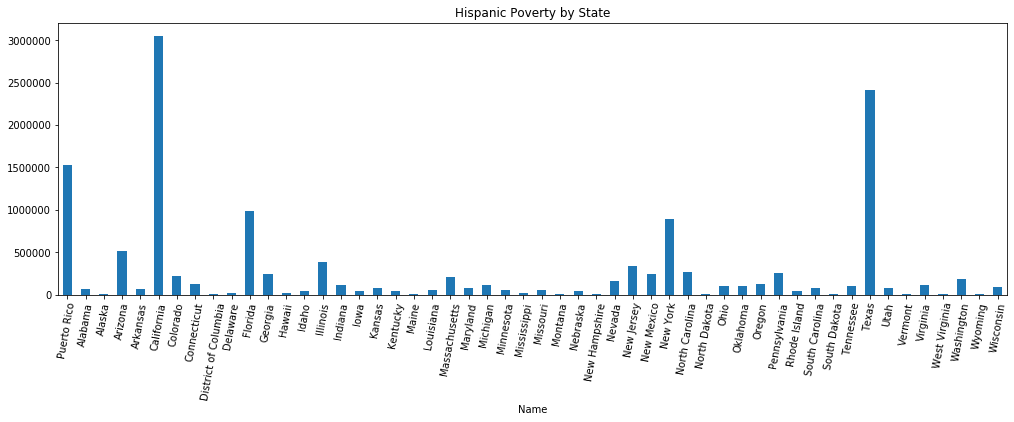

In [7]:
new_census_df = census_df[['Name','Hispanic Poverty']].set_index('Name')

new_census_df.plot(kind='bar',figsize = (17, 5),title = 'Hispanic Poverty by State',legend = False,rot = 80)

In [12]:
key_data = census_df[['Hispanic Poverty']]

heat_locations = census_df[['Latitude', 'Longitude']]

fig = gmaps.figure(map_type = "HYBRID",layout ={'width': '600px', 'height': '300px',
              'padding':'1px','border':'1px'})

heat_layer = gmaps.heatmap_layer(heat_locations, 
                                 dissipating=False, max_intensity=7,
                                 point_radius=3)


fig.add_layer(heat_layer)


fig

Figure(layout=FigureLayout(border='1px', height='300px', padding='1px', width='600px'))